<a href="https://colab.research.google.com/github/jo-cho/memos/blob/master/option_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

%matplotlib inline

잔존만기 계산

In [0]:
def time_to_maturity(t0, T, y=252):
  t0 = np.datetime64(t0)
  T = np.datetime64(T)
  #weekday만 계산
  return (np.busday_count(t0,T)/y)

In [34]:
time_to_maturity('2019-01-01','2020-01-01')

1.0357142857142858

블랙숄즈 방정식을 이용한 콜옵션가격 구하기

$$ C = S_0 N(d_1)-Ke^{-rT}N(d_2) $$


$$ d_1 =\frac{ ln \frac{S_0}{K} + (r + \frac{\sigma^2}{2}T)} {\sigma\sqrt{T}}$$

$$ d_2 = \frac{ ln \frac{S_0}{K} + (r - \frac{\sigma^2}{2}T)} {\sigma\sqrt{T}} $$

In [0]:
def call_price(S,K,ttm,r,sigma):
  d1 = ( np.log(S/K) + (r + sigma**2 * 0.5 * ttm)/ ( sigma * np.sqrt(ttm)))
  d2 = ( np.log(S/K) + (r - sigma**2 * 0.5 * ttm)/ ( sigma * np.sqrt(ttm)))
  val = S*ss.norm.cdf(d1,0,1) - K*np.exp(-r*ttm)*ss.norm.cdf(d2,0,1)
  return val

기초자산 및 행사가격 변화에 따른 콜옵션가격 변화

In [0]:
def call_space(S,K,ttm,r,sigma):
  call_space = dict()
  for k in K:
    single_space = dict()
    for s in S:
      single_space[s] = call_price(s,k,ttm,r,sigma)
    call_space[k] = pd.Series(single_space)
  df = pd.DataFrame(call_space)
  return df

In [0]:
def plot_option(df):
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  for a in df.columns:
    ax.plot(df[a],label=a)
  ax.legend(loc='best')

In [0]:
ttm = time_to_maturity('2019-09-01','2020-01-01')
r = 0.01
#sigma = 0.15
K = np.linspace(250,350,3)
S = np.arange(0,600,10)

위험에 따른 가격

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


when sigma is 0.1
when sigma is 0.5
when sigma is 0.9


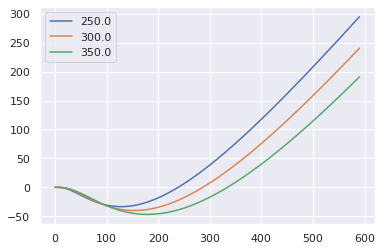

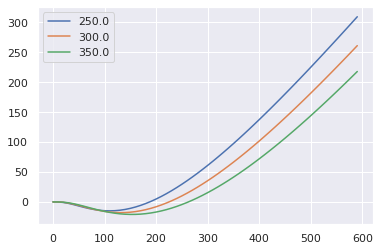

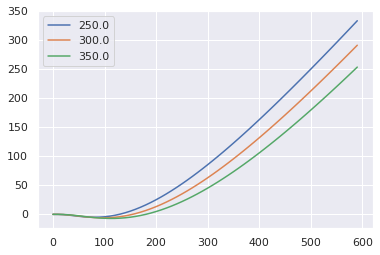

In [137]:
for s in np.linspace(0.1,0.9,3):
  dfs = call_space(S,K,ttm,r,s)
  print('when sigma is',s)
  plot_option(dfs)

콜옵션가격 구하기

$$ P = K e^{-rT} N(-d_2) - S_0N(-d_1) $$

In [0]:
def put_price(S,K,ttm,r,sigma):
  d1 = ( np.log(S/K) + (r + sigma**2 * 0.5 * ttm)/ ( sigma * np.sqrt(ttm)))
  d2 = ( np.log(S/K) + (r - sigma**2 * 0.5 * ttm)/ ( sigma * np.sqrt(ttm)))
  p = K*np.exp(-r*ttm)*ss.norm.cdf(-d2) - S*ss.norm.cdf(-d1)
  return p 

In [0]:
def put_space(S,K,ttm,r,sigma):
  put_space = dict()
  for k in K:
    single_space = dict()
    for s in S:
      single_space[s] = put_price(s,k,ttm,r,sigma)
    put_space[k] = pd.Series(single_space)
  df = pd.DataFrame(put_space)
  return df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


when sigma is 0.1
when sigma is 0.6
when sigma is 1.1


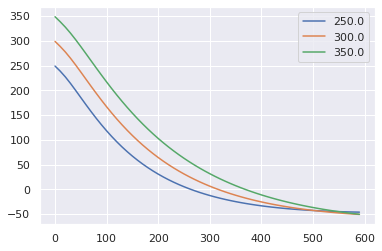

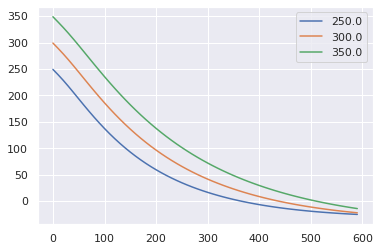

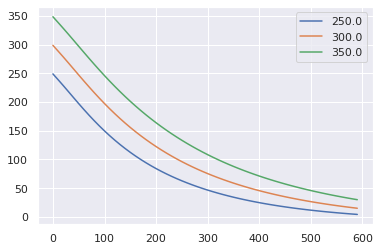

In [141]:
for s in np.linspace(0.1,1.1,3):
  dfs = put_space(S,K,ttm,r,s)
  print('when sigma is',s)
  plot_option(dfs)

3D

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [0]:
ttm = time_to_maturity('2019-09-01','2020-01-01')
r = 0.01
#sigma = 0.15
K = np.linspace(200,400,10)
S = np.arange(200,400,10)

In [0]:
def plot3d(S,K,put=False):
  S,K = np.meshgrid(S,K)
  if put==False: 
    Z = call_price(S,K,ttm,r,sigma) 
  else:
    Z = put_price(S,K,ttm,r,sigma)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  surf = ax.plot_surface(S,K,Z, cmap=cm.summer, linewidth=1, antialiased=True, alpha=0.8)

  ax.set_xlabel('S')
  ax.set_ylabel('K')
  ax.set_zlabel('Price')

  fig.colorbar(surf,shrink=0.5, aspect=5)

when sigma is 0.1
when sigma is 0.55
when sigma is 1.0


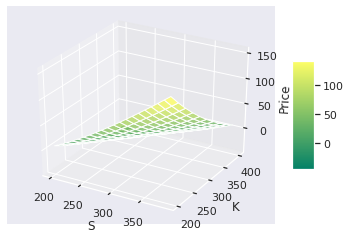

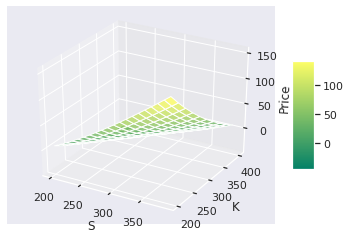

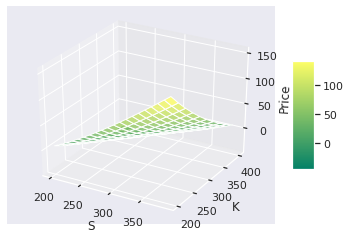

In [143]:
for s in np.linspace(0.1,1,3):
  print('when sigma is',s)
  plot3d(S,K)

when sigma is 0.1
when sigma is 0.55
when sigma is 1.0


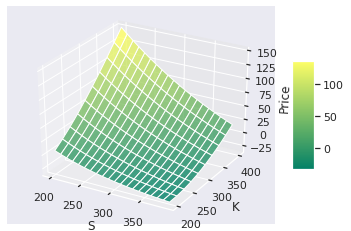

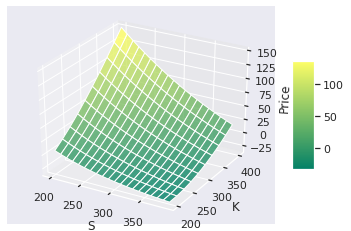

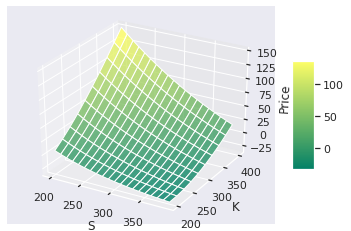

In [144]:
for s in np.linspace(0.1,1,3):
  print('when sigma is',s)
  plot3d(S,K,put=True)